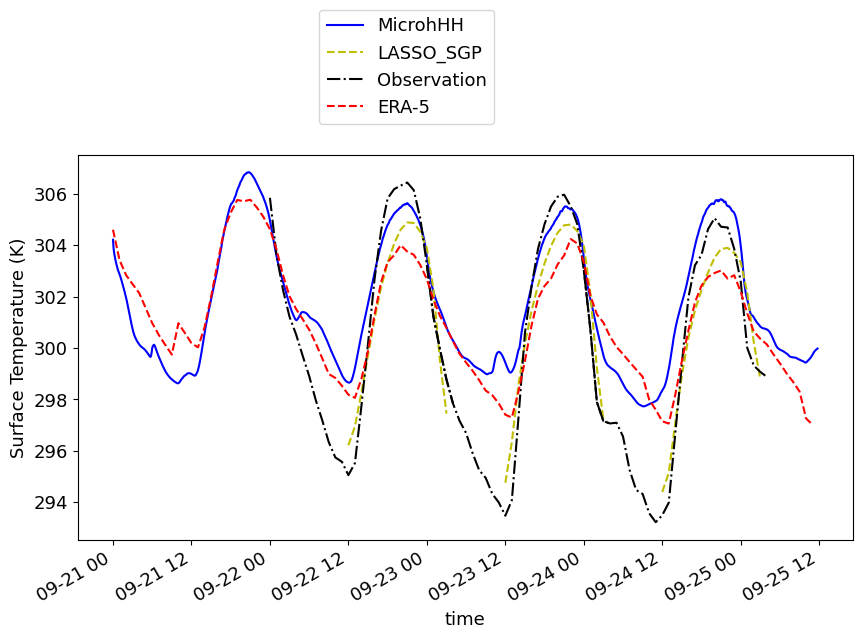

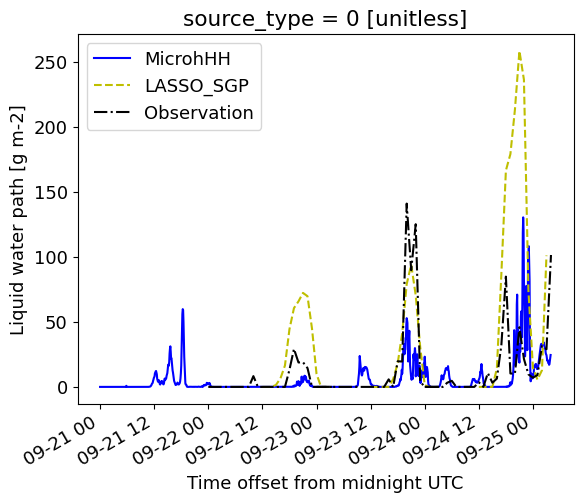

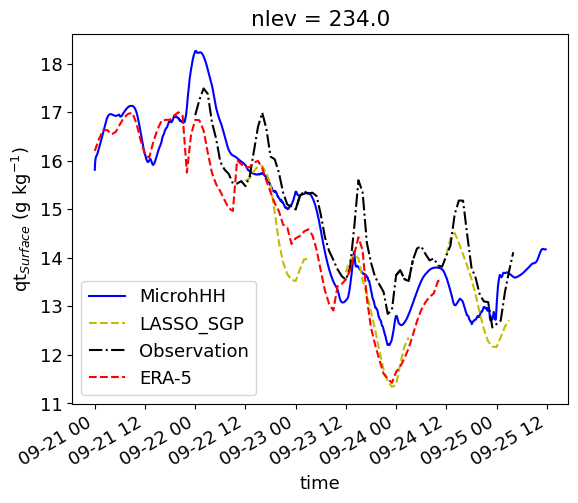

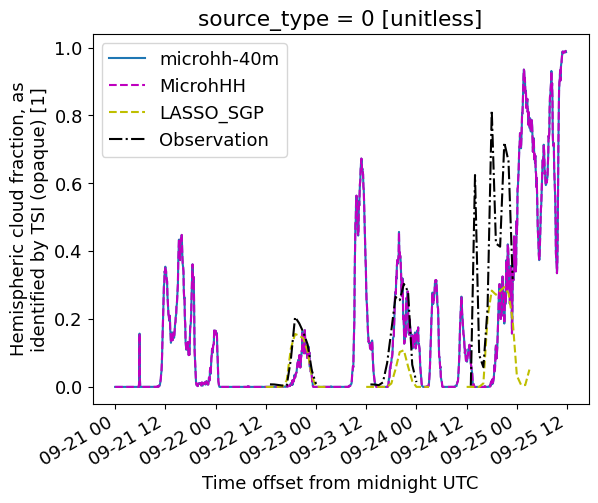

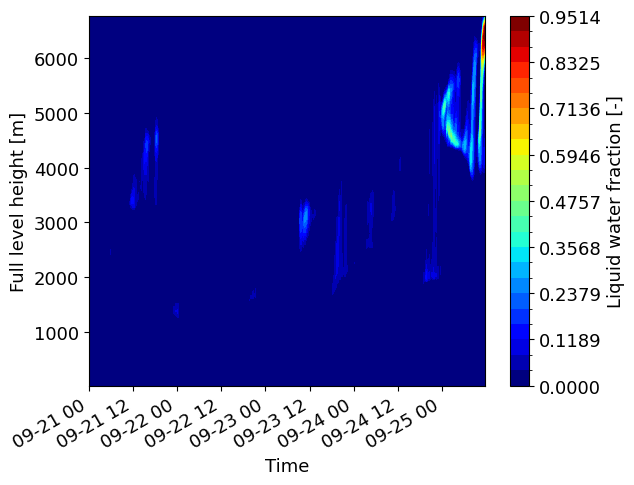

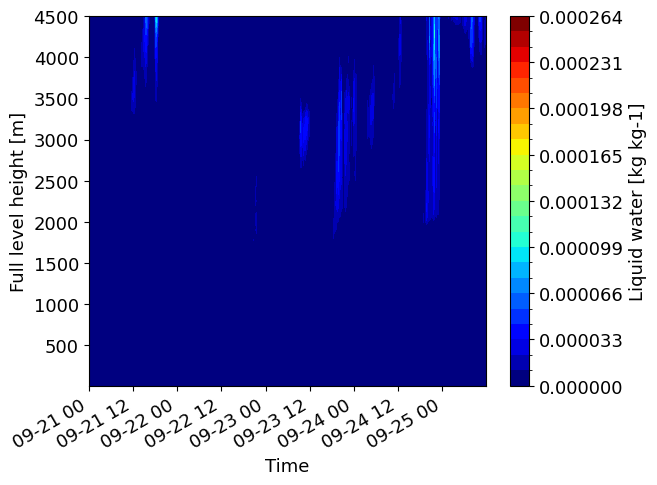

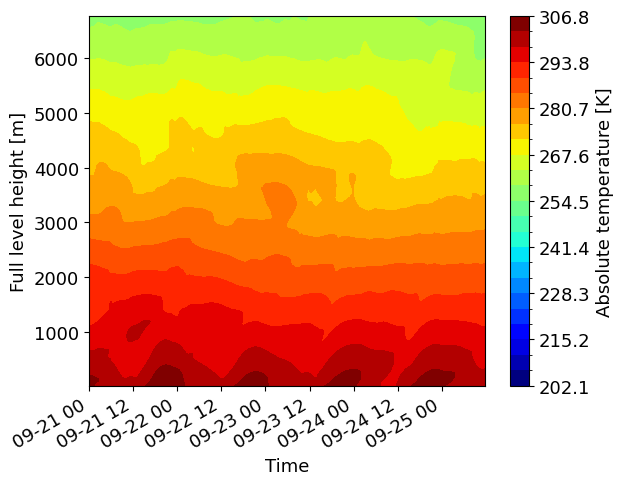

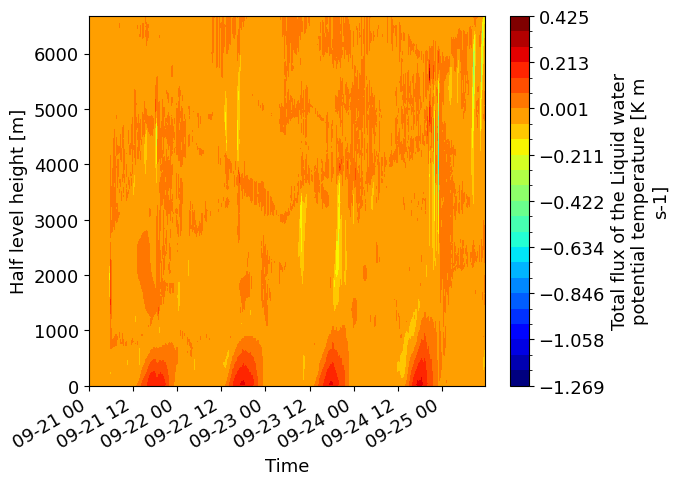

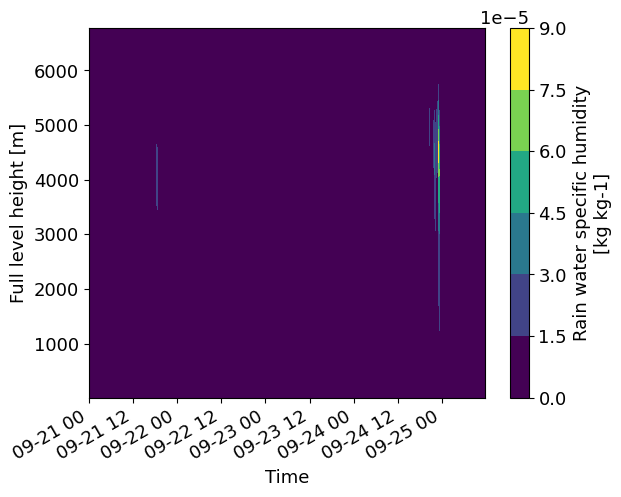

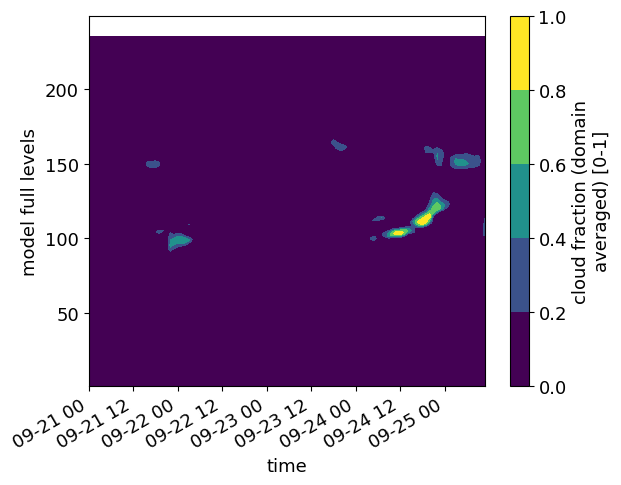

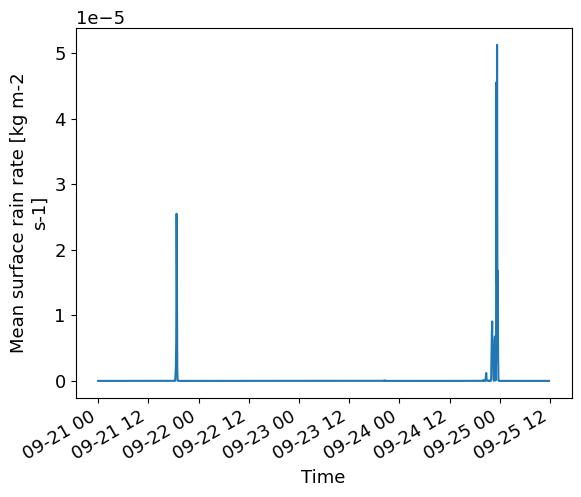

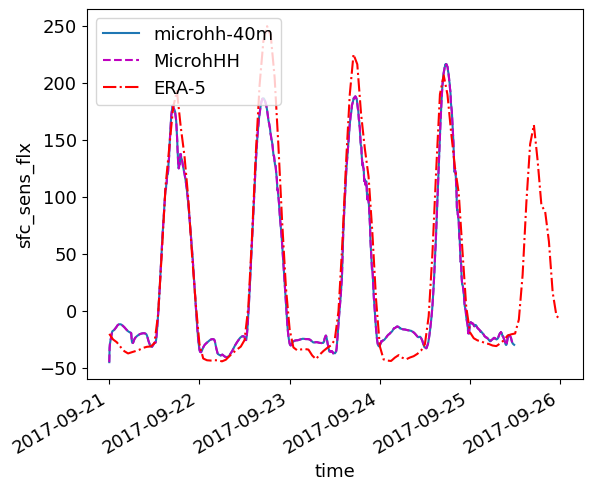

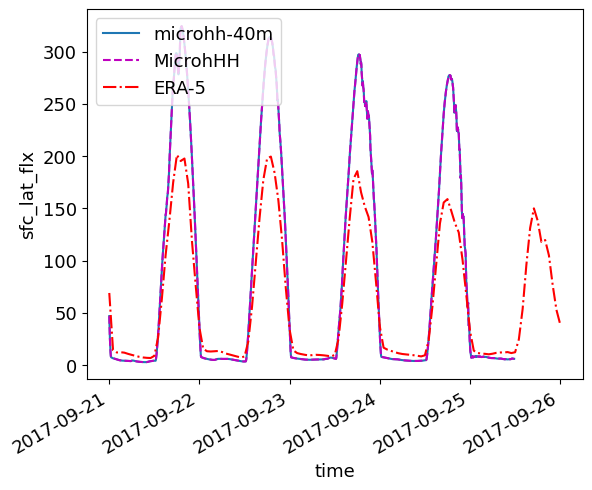

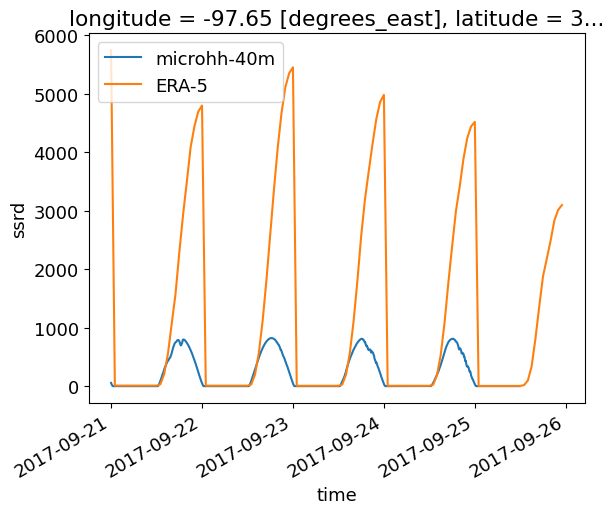

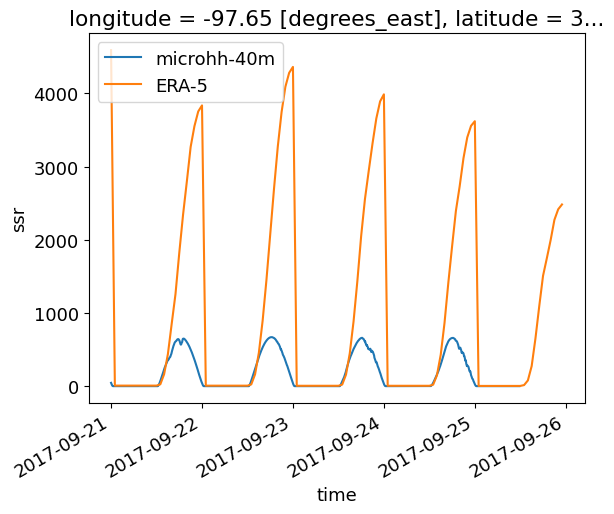

In [1]:
###### September 2017 case SGP #################


import xarray as xr
import matplotlib.pyplot as pl
import matplotlib
import numpy as np
import netCDF4 as nc
from netCDF4 import Dataset
import os 

date_plot='20170922'
sim='2'

ncpath=f'/fs/ess/PFS0220/LSM/SGP/SGP_{date_plot}/'
ncpath2=f'/fs/ess/PFS0220/LSM/SGP/SGP_{date_plot}_2/'
forcing_path='/fs/ess/PFS0220/LSM/SGP/forcings/'
ncfilename='SGP.default.0000000.nc'
forcing_filename=f'SGP_20170921.kpt.nc'

label1='microhh-40m'
label2='MicrohHH'
pwd=f'/fs/ess/PFS0220/LSM/SGP/SGP_obs_sim{sim}/obs_model/'
#ncfilename_2d=f'sgplassodiagobsmod2d2C1.m1.{date_plot}.000000.nc'


microhh_out=xr.open_dataset(ncpath+ncfilename,decode_times=True)
rootgroup = Dataset(ncpath+ncfilename,"r")
for group in rootgroup.groups:
    microhh_out=xr.merge([microhh_out, xr.open_dataset(ncpath+ncfilename,group=group,decode_times=True)])


#microhh_out=xr.concat([microhh_out,microhh_out2.isel(time=slice(14,200))],dim='time')

ncfilename2='SGP.default.0000000.nc'
microhh_out2=xr.open_dataset(ncpath2+ncfilename2,decode_times=True)
rootgroup = Dataset(ncpath2+ncfilename2,"r")
for group in rootgroup.groups:
    microhh_out2=xr.merge([microhh_out2, xr.open_dataset(ncpath2+ncfilename2,group=group,decode_times=True)])

ncfilename='eurec4a.default.0000000.nc'
ncfilename='SGP.default.0000000.nc'

prefixed = [filename for filename in os.listdir(pwd) if filename.startswith(f'sgplassodiagobsmod{sim}C1.m1.{date_plot}.')]
sgpfilename=str(prefixed[0])

era5_forcing=xr.open_dataset(forcing_path+forcing_filename)
date_plot='20170922'
prefixed = [filename for filename in os.listdir(pwd) if filename.startswith(f'sgplassodiagobsmod{sim}C1.m1.{date_plot}.')]
sgpfilename1=str(prefixed[0])
date_plot='20170923'
prefixed = [filename for filename in os.listdir(pwd) if filename.startswith(f'sgplassodiagobsmod{sim}C1.m1.{date_plot}.')]
sgpfilename2=str(prefixed[0])
date_plot='20170924'
prefixed = [filename for filename in os.listdir(pwd) if filename.startswith(f'sgplassodiagobsmod{sim}C1.m1.{date_plot}.')]
sgpfilename3=str(prefixed[0])

lasso_sgp1=xr.open_dataset(pwd+sgpfilename1,decode_times=True)
lasso_sgp2=xr.open_dataset(pwd+sgpfilename2,decode_times=True)
lasso_sgp3=xr.open_dataset(pwd+sgpfilename3,decode_times=True)
lasso_sgp=xr.merge([lasso_sgp1,lasso_sgp2,lasso_sgp3],compat='override',join='outer')

era_single=xr.open_dataset('/fs/ess/PFS0220/LSM/Jupyter_files/era_land_SGP_20170921.nc',decode_times=True)
era_single['ssrd']=era_single['ssrd']/3600
era_single['ssr']=era_single['ssr']/3600

matplotlib.rcParams.update({'font.size': 13})
fig, ax = pl.subplots(figsize=(10, 5))
#microhh_out['T'].isel(z=0).plot.line(label=label1)
microhh_out2['T'].isel(z=0).plot.line('b-',label=label2)
lasso_sgp1['temperature_surface'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
lasso_sgp1['temperature_surface'].isel(source_type=0).plot.line('k-.',label='Observation')
lasso_sgp2['temperature_surface'].isel(source_type=1).plot.line('y--')
lasso_sgp2['temperature_surface'].isel(source_type=0).plot.line('k-.')
lasso_sgp3['temperature_surface'].isel(source_type=1).plot.line('y--')
lasso_sgp3['temperature_surface'].isel(source_type=0).plot.line('k-.')
era5_forcing['t'].isel(nlev=234,time=slice(0,108)).plot.line('r--',label='ERA-5')
#ax.set_aspect(2)
pl.ylabel('Surface Temperature (K)')
pl.legend(bbox_to_anchor=(0.3, 1.4),loc="upper left")
ax.axis('tight')
pl.title('')

pl.figure()
#(microhh_out['ql_path']*1000).isel(time=slice(0*12,100*12)).plot.line(label=label1)
(microhh_out2['ql_path']*1000).isel(time=slice(0*12,100*12)).plot.line('b-',label=label2)
lasso_sgp1['lwp'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
lasso_sgp1['lwp'].isel(source_type=0).plot.line('k-.',label='Observation')
lasso_sgp2['lwp'].isel(source_type=1).plot.line('y--')
lasso_sgp2['lwp'].isel(source_type=0).plot.line('k-.')
lasso_sgp3['lwp'].isel(source_type=1).plot.line('y--')
lasso_sgp3['lwp'].isel(source_type=0).plot.line('k-.')
pl.legend(loc="upper left")

pl.figure()
#(microhh_out['qt']*1000).isel(z=0).plot.line(label=label1)
(microhh_out2['qt']*1000).isel(z=0).plot.line('b-',label=label2)
lasso_sgp1['water_vapor_mixing_ratio_surface'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
lasso_sgp1['water_vapor_mixing_ratio_surface'].isel(source_type=0).plot.line('k-.',label='Observation')
lasso_sgp2['water_vapor_mixing_ratio_surface'].isel(source_type=1).plot.line('y--')
lasso_sgp2['water_vapor_mixing_ratio_surface'].isel(source_type=0).plot.line('k-.')
lasso_sgp3['water_vapor_mixing_ratio_surface'].isel(source_type=1).plot.line('y--')
lasso_sgp3['water_vapor_mixing_ratio_surface'].isel(source_type=0).plot.line('k-.')
(era5_forcing['q']*1000).isel(nlev=233,time=slice(0,84)).plot.line('r--',label='ERA-5')
pl.ylabel('qt$_{Surface}$ (g kg$^{-1}$)')
pl.legend(loc="lower left")


pl.figure()
(microhh_out['ql_cover']).plot.line(label=label1)
(microhh_out2['ql_cover']).plot.line('m--',label=label2)
lasso_sgp1['cloud_fraction_tsi'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
lasso_sgp1['cloud_fraction_tsi'].isel(source_type=0).plot.line('k-.',label='Observation')
lasso_sgp2['cloud_fraction_tsi'].isel(source_type=1).plot.line('y--')
lasso_sgp2['cloud_fraction_tsi'].isel(source_type=0).plot.line('k-.')
lasso_sgp3['cloud_fraction_tsi'].isel(source_type=1).plot.line('y--')
lasso_sgp3['cloud_fraction_tsi'].isel(source_type=0).plot.line('k-.')
pl.legend(loc="upper left")

pl.figure()
microhh_out['ql_frac'].isel(z=slice(0,150)).transpose().plot.contourf(levels=np.linspace(0,np.max(microhh_out['ql_frac'].values),25), cmap='jet')

pl.figure()
microhh_out['ql'].isel(z=slice(0,120)).transpose().plot.contourf(levels=np.linspace(0,np.max(microhh_out['ql'].values),25), cmap='jet')

pl.figure()
microhh_out['T'].isel(z=slice(0,150)).transpose().plot.contourf(levels=np.linspace(np.min(microhh_out['T'].values),np.max(microhh_out['T'].values),25), cmap='jet')

pl.figure()
microhh_out['thl_flux'].isel(zh=slice(0,150)).transpose().plot.contourf(levels=np.linspace(np.min(microhh_out['thl_flux'].values),np.max(microhh_out['thl_flux'].values),25), cmap='jet')

pl.figure()
microhh_out['qr'].isel(z=slice(0,150)).transpose().plot.contourf()

pl.figure()
era5_forcing['cloud_fraction'].isel(nlev=slice(0,500),time=slice(0,108)).transpose().plot.contourf()

pl.figure()
microhh_out['rr'].plot()


pl.figure()
microhh_out['H'].plot.line(label=label1)
microhh_out2['H'].plot.line('m--',label=label2)
(era5_forcing['sfc_sens_flx']*-1).plot.line('r-.',label='ERA-5')
pl.legend(loc="upper left")

pl.figure()
microhh_out['LE'].plot.line(label=label1)
microhh_out2['LE'].plot.line('m--',label=label2)
(-1*era5_forcing['sfc_lat_flx']).plot.line('r-.',label='ERA-5')
pl.legend(loc="upper left")

pl.figure()
microhh_out['sw_flux_dn'].isel(zh=0).plot.line(label=label1)
era_single['ssrd'].isel(latitude=1,longitude=1).plot(label='ERA-5')
pl.legend(loc="upper left")

pl.figure()
(microhh_out['sw_flux_dn']-microhh_out['sw_flux_up']).isel(zh=0).plot.line(label=label1)
era_single['ssr'].isel(latitude=1,longitude=1).plot(label='ERA-5')
pl.legend(loc="upper left")


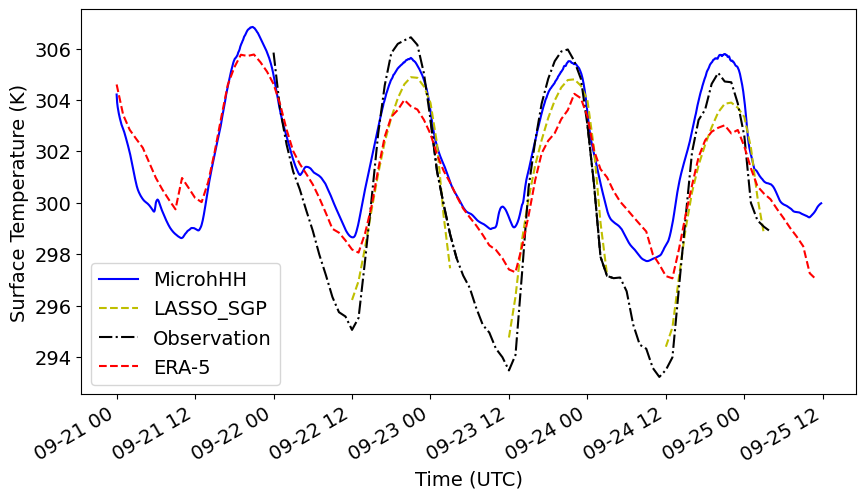

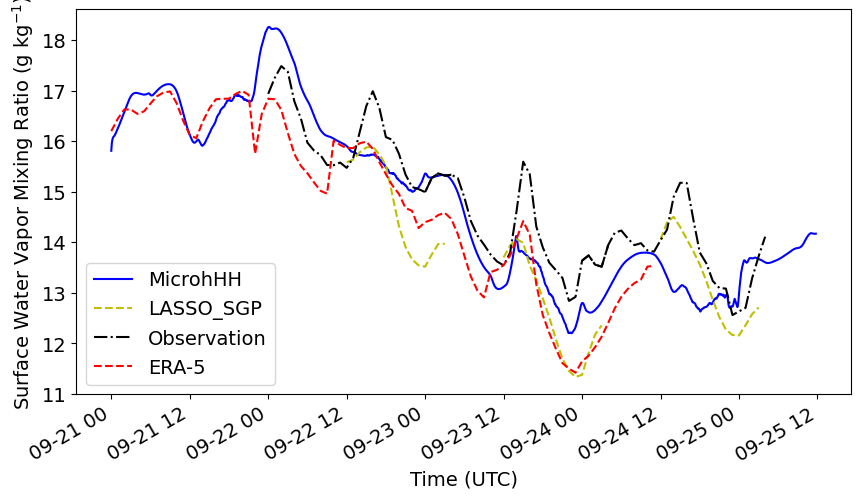

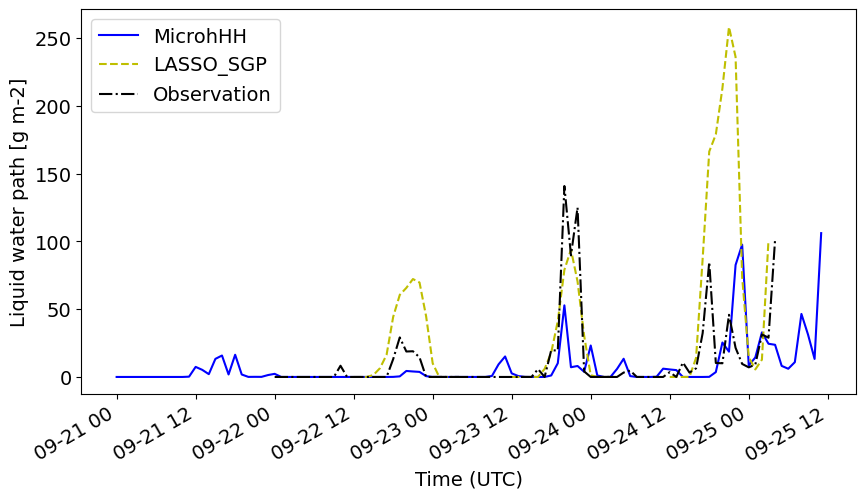

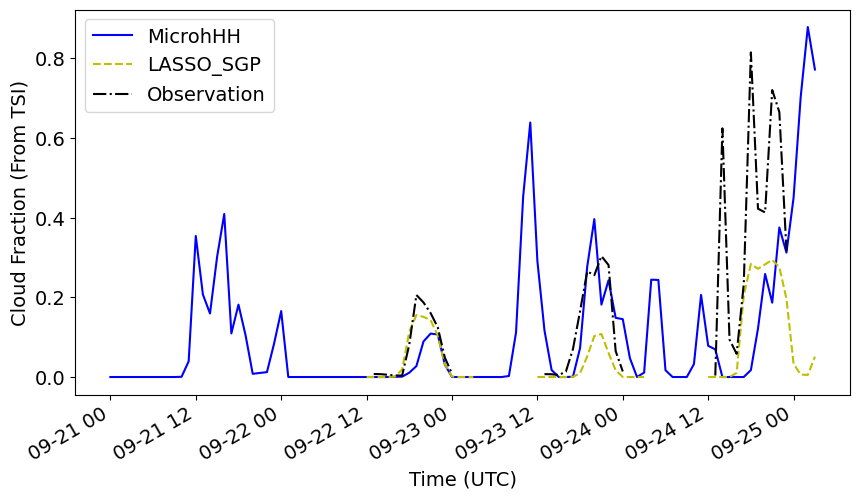

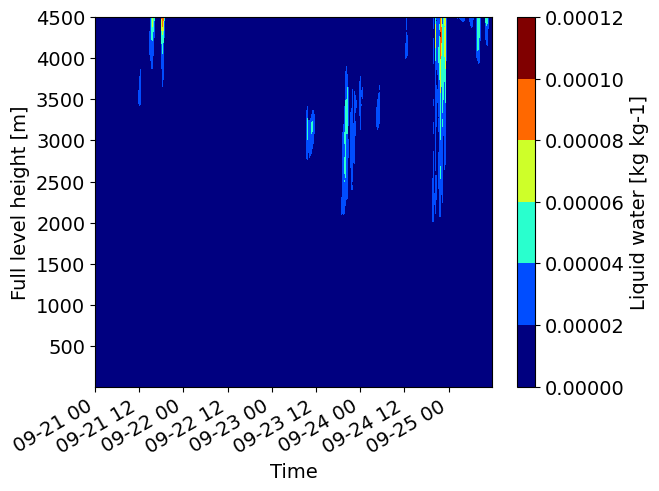

In [2]:
matplotlib.rcParams.update({'font.size': 14})
fig, ax = pl.subplots(figsize=(10, 5))
microhh_out2['T'].isel(z=0).plot.line('b-',label=label2)
lasso_sgp1['temperature_surface'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
lasso_sgp1['temperature_surface'].isel(source_type=0).plot.line('k-.',label='Observation')
lasso_sgp2['temperature_surface'].isel(source_type=1).plot.line('y--')
lasso_sgp2['temperature_surface'].isel(source_type=0).plot.line('k-.')
lasso_sgp3['temperature_surface'].isel(source_type=1).plot.line('y--')
lasso_sgp3['temperature_surface'].isel(source_type=0).plot.line('k-.')
era5_forcing['t'].isel(nlev=234,time=slice(0,108)).plot.line('r--',label='ERA-5')
#ax.set_aspect(2)
pl.ylabel('Surface Temperature (K)')
pl.xlabel('Time (UTC)')
#pl.legend(bbox_to_anchor=(0.6, 1.35))
pl.legend(loc="lower left")
ax.axis('tight')
pl.title('')

pl.subplots(figsize=(10, 5))
(microhh_out2['qt']*1000).isel(z=0).plot.line('b-',label=label2)
lasso_sgp1['water_vapor_mixing_ratio_surface'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
lasso_sgp1['water_vapor_mixing_ratio_surface'].isel(source_type=0).plot.line('k-.',label='Observation')
lasso_sgp2['water_vapor_mixing_ratio_surface'].isel(source_type=1).plot.line('y--')
lasso_sgp2['water_vapor_mixing_ratio_surface'].isel(source_type=0).plot.line('k-.')
lasso_sgp3['water_vapor_mixing_ratio_surface'].isel(source_type=1).plot.line('y--')
lasso_sgp3['water_vapor_mixing_ratio_surface'].isel(source_type=0).plot.line('k-.')
(era5_forcing['q']*1000).isel(nlev=233,time=slice(0,84)).plot.line('r--',label='ERA-5')
pl.ylabel('Surface Water Vapor Mixing Ratio (g kg$^{-1}$)')
pl.xlabel('Time (UTC)')
pl.legend(loc="lower left")
pl.title('')

pl.subplots(figsize=(10, 5))
(microhh_out2['ql_path']*1000).isel(time=slice(None,None,12)).plot.line('b-',label=label2)
lasso_sgp1['lwp'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
lasso_sgp1['lwp'].isel(source_type=0).plot.line('k-.',label='Observation')
lasso_sgp2['lwp'].isel(source_type=1).plot.line('y--')
lasso_sgp2['lwp'].isel(source_type=0).plot.line('k-.')
lasso_sgp3['lwp'].isel(source_type=1).plot.line('y--')
lasso_sgp3['lwp'].isel(source_type=0).plot.line('k-.')
pl.legend(loc="upper left")
pl.xlabel('Time (UTC)')
pl.title('')

pl.subplots(figsize=(10, 5))
(microhh_out2['ql_cover']).isel(time=slice(None,100*12,12)).plot.line('b-',label=label2)
lasso_sgp1['cloud_fraction_tsi'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
lasso_sgp1['cloud_fraction_tsi'].isel(source_type=0).plot.line('k-.',label='Observation')
lasso_sgp2['cloud_fraction_tsi'].isel(source_type=1).plot.line('y--')
lasso_sgp2['cloud_fraction_tsi'].isel(source_type=0).plot.line('k-.')
lasso_sgp3['cloud_fraction_tsi'].isel(source_type=1).plot.line('y--')
lasso_sgp3['cloud_fraction_tsi'].isel(source_type=0).plot.line('k-.')
pl.ylabel('Cloud Fraction (From TSI)') 
pl.xlabel('Time (UTC)')
pl.legend(loc="upper left")
pl.title('')

pl.figure()
microhh_out['ql'].isel(z=slice(0,120)).transpose().plot.contourf(cmap='jet')

In [ ]:
import xarray as xr
import matplotlib.pyplot as pl
import numpy as np
import netCDF4 as nc
from netCDF4 import Dataset

ncpath='/fs/ess/PFS0220/LSM/SGP/SGP_20170922/'
ql=xr.open_dataset(ncpath+'ql.nc',decode_times=True)
u=xr.open_dataset(ncpath+'u.nc',decode_times=True)
v=xr.open_dataset(ncpath+'v.nc',decode_times=True)

allvars=xr.merge([ql,u,v])
allvars['time']=allvars['time']/3600
allvars.time.encoding['units'] = 'hrs (since 21st September 2017 00:00 UTC)'

pl.figure()
allvars['ql'].isel(time=0,z=25).plot.contourf()

pl.figure()
allvars['u'].isel(time=10,z=25).plot.contourf()

pl.figure()
allvars['v'].isel(time=0,z=25).plot.contourf()

pl.figure()
allvars['u'].isel(xh=100,y=100,z=25).plot()

In [1]:
###### September 2017 case SGP #################


import xarray as xr
import matplotlib.pyplot as pl
import numpy as np
import netCDF4 as nc
from netCDF4 import Dataset
import os 
import matplotlib

date_plot='20150829'
forcing_date='20150826'
label1='microhh'
sim='2'

ncpath=f'/fs/ess/PFS0220/LSM/SGP/SGP_{date_plot}_prescribed/'
ncfilename='SGP.default.0000000.nc'

forcing_filename=f'SGP_{forcing_date}.kpt.nc'
forcing_path='/fs/ess/PFS0220/LSM/SGP/forcings/'


sgp_path=f'/fs/ess/PFS0220/LSM/SGP/SGP_obs_sim{sim}/obs_model/'
prefixed = [filename for filename in os.listdir(sgp_path) if filename.startswith(f'sgplassodiagobsmod{sim}C1.m1.{date_plot}.')]
sgpfilename=str(prefixed[0])


lasso_sgp=xr.open_dataset(sgp_path+sgpfilename,decode_times=True)
tlen_sgp=len(lasso_sgp['time'].values[:])-1

microhh_out=xr.open_dataset(ncpath+ncfilename,decode_times=True)
rootgroup = Dataset(ncpath+ncfilename,"r")
for group in rootgroup.groups:
    microhh_out=xr.merge([microhh_out, xr.open_dataset(ncpath+ncfilename,group=group,decode_times=True)])
microhh_out_slice=microhh_out.sel(time=slice(lasso_sgp['time'].isel(time=0).values,lasso_sgp['time'].isel(time=tlen_sgp).values))

ncpath=f'/fs/ess/PFS0220/LSM/SGP/SGP_{date_plot}/'
ncfilename='SGP.default.0001728.nc'
ncfilename='SGP.default.0000000.nc'
microhh_out2=xr.open_dataset(ncpath+ncfilename,decode_times=True)
rootgroup = Dataset(ncpath+ncfilename,"r")
for group in rootgroup.groups:
    microhh_out2=xr.merge([microhh_out2, xr.open_dataset(ncpath+ncfilename,group=group,decode_times=True)])
microhh_out_slice2=microhh_out2.sel(time=slice(lasso_sgp['time'].isel(time=0).values,lasso_sgp['time'].isel(time=tlen_sgp).values))

print(lasso_sgp['time'].isel(time=0).values)
era5_forcing=xr.open_dataset(forcing_path+forcing_filename,decode_times=True)
era5_forcing_slice=era5_forcing.sel(time=slice(lasso_sgp['time'].isel(time=0).values,lasso_sgp['time'].isel(time=tlen_sgp).values))

def fig_plot():
    pl.figure()
    microhh_out['T'].isel(z=0,time=slice(0,24*12)).plot.line(label='MicroHH Prescribed Surface Fluxes') 
    era5_forcing['t'].isel(nlev=234,time=slice(72,96)).plot.line('r--',label='ERA-5')
    pl.ylabel('Surface Temperature (K)')
    pl.legend(bbox_to_anchor=(0.2, 1.03))
    pl.title('')

    pl.figure()
    microhh_out_slice['T'].isel(z=0).plot.line(label=label1)
    lasso_sgp['temperature_surface'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
    lasso_sgp['temperature_surface'].isel(source_type=0).plot.line('k-.',label='Observation')
    era5_forcing_slice['t'].isel(nlev=234).plot.line('r--',label='ERA-5')
    pl.ylabel('Surface Temperature (K)')
    pl.legend(bbox_to_anchor=(0.3, 1.3),loc="upper left")
    pl.title('')

    pl.figure()
    (microhh_out_slice['ql_path']*1000).plot.line(label=label1)
    lasso_sgp['lwp'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
    lasso_sgp['lwp'].isel(source_type=0).plot.line('k-.',label='Observation')
    pl.legend(loc="upper left")
    pl.title('')

    pl.figure()
    (microhh_out_slice['ql_path']*1000).isel(time=slice(None,None,12)).plot.line(label=label1)
    lasso_sgp['lwp'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
    lasso_sgp['lwp'].isel(source_type=0).plot.line('k-.',label='Observation')
    pl.legend(loc="upper left")

    pl.figure()
    microhh_out_slice['T'].isel(z=slice(20,25)).mean(dim='z').plot.line(label=label1)
    lasso_sgp['temperature_boundary_layer'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
    lasso_sgp['temperature_boundary_layer'].isel(source_type=0).plot.line('k-.',label='Observation')
    pl.ylabel('Boundary Layer Temperature (K)')
    pl.legend(bbox_to_anchor=(0.3, 1.3),loc="upper left")
    pl.title('')

    pl.figure()
    (microhh_out_slice['qt']*1000).isel(z=slice(20,25)).mean(dim='z').plot.line(label=label1)
    lasso_sgp['water_vapor_mixing_ratio_boundary_layer'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
    lasso_sgp['water_vapor_mixing_ratio_boundary_layer'].isel(source_type=0).plot.line('k-.',label='Observation')
    pl.ylabel('Boundary Layer Mixing Ratio (g kg$^{-1}$)')
    pl.legend(bbox_to_anchor=(0.3, 1.3),loc="upper left")
    pl.title('')

    pl.figure()
    microhh_out['ql_frac'].isel(z=slice(0,400)).transpose().plot.contourf(levels=np.linspace(0,np.max(microhh_out['ql_frac'].values),25), cmap='jet')

    pl.figure()
    microhh_out['ql_frac'].isel(z=slice(0,150)).transpose().plot.contourf(cmap='jet')

    pl.figure()
    microhh_out['ql'].isel(z=slice(0,110)).transpose().plot.contourf(cmap='jet')

    pl.figure()
    microhh_out2['ql'].isel(z=slice(0,180)).transpose().plot.contourf(cmap='jet')

    pl.figure()
    era5_forcing['cloud_fraction'].isel(nlev=slice(0,800),time=slice(0,None)).transpose().plot.contourf()
    pl.gca().invert_yaxis()
    pl.yticks(era5_forcing['nlev'].isel(nlev=slice(30,None,40)).values[:],np.around(era5_forcing['zf'].isel(time=0,nlev=slice(30,None,40)).values[:]))
    pl.show()

    pl.figure()
    era5_forcing['ql'].isel(nlev=slice(0,800),time=slice(0,None)).transpose().plot.contourf()
    pl.gca().invert_yaxis()
    pl.yticks(era5_forcing['nlev'].isel(nlev=slice(30,None,40)).values[:],np.around(era5_forcing['zf'].isel(time=0,nlev=slice(30,None,40)).values[:]))
    pl.show()

    pl.figure()
    (microhh_out_slice['qt']*1000).isel(z=0).plot.line(label=label1)
    lasso_sgp['water_vapor_mixing_ratio_surface'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
    lasso_sgp['water_vapor_mixing_ratio_surface'].isel(source_type=0).plot.line('k-.',label='Observation')
    (era5_forcing_slice['q']*1000).isel(nlev=233).plot.line('r--',label='ERA-5')
    pl.ylabel('Surface Water Vapor Mixing Ratio (g kg$^{-1}$)')
    pl.legend(bbox_to_anchor=(0.3, 1.3),loc="upper left")
    pl.title('')

    pl.figure()
    (microhh_out['ql_cover']).plot.line(label=label1)
    lasso_sgp['cloud_fraction_tsi'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
    lasso_sgp['cloud_fraction_tsi'].isel(source_type=0).plot.line('k-.',label='Observation')
    pl.legend(loc="upper left")


    pl.figure()
    microhh_out['T'].isel(z=slice(0,150)).transpose().plot.contourf(levels=np.linspace(np.min(microhh_out['T'].values),np.max(microhh_out['T'].values),25), cmap='jet')

    pl.figure()
    microhh_out['thl_flux'].isel(zh=slice(0,150)).transpose().plot.contourf(levels=np.linspace(np.min(microhh_out['thl_flux'].values),np.max(microhh_out['thl_flux'].values),25), cmap='jet')


    pl.figure()
    microhh_out['rr'].plot()


    pl.figure()
    microhh_out['H'].plot.line(label=label1)
    (era5_forcing['sfc_sens_flx']*-1).plot.line('r-.',label='ERA-5')
    pl.legend(loc="upper left")

    pl.figure()
    microhh_out['LE'].plot.line(label=label1)
    (-1*era5_forcing['sfc_lat_flx']).plot.line('r-.',label='ERA-5')
    pl.legend(loc="upper left")



2015-08-29T12:00:00.000000000


(0.0, 8000.0)

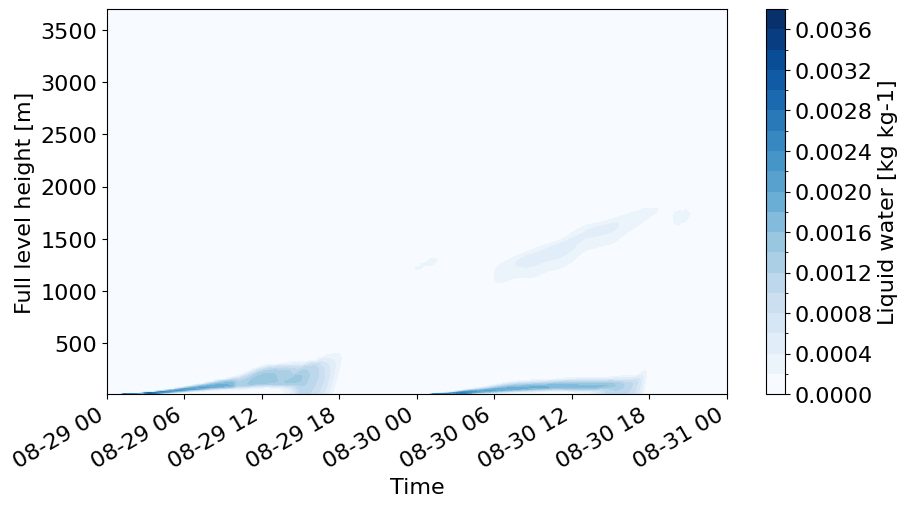

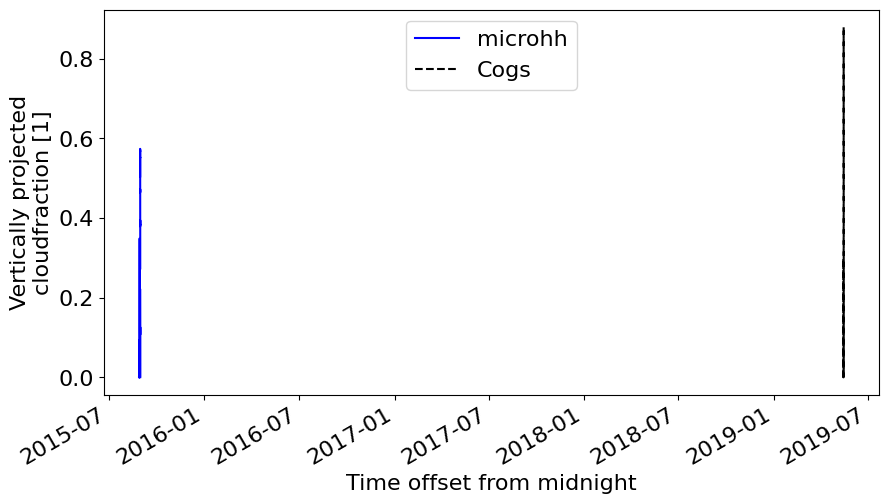

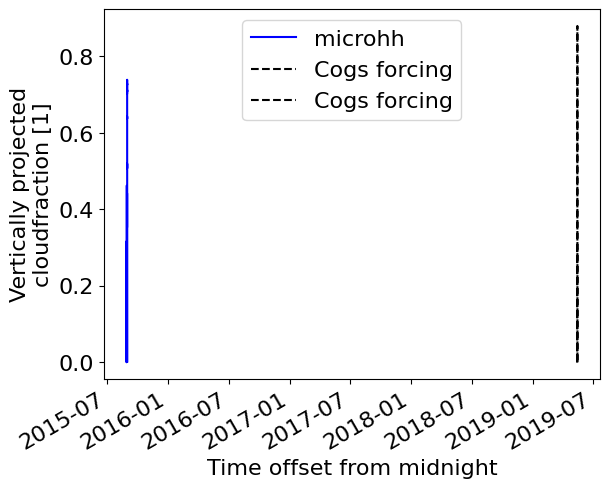

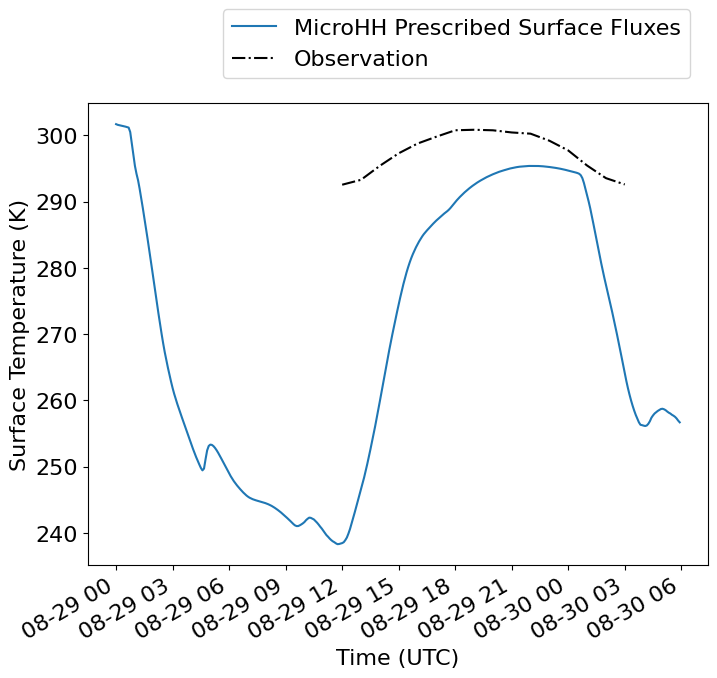

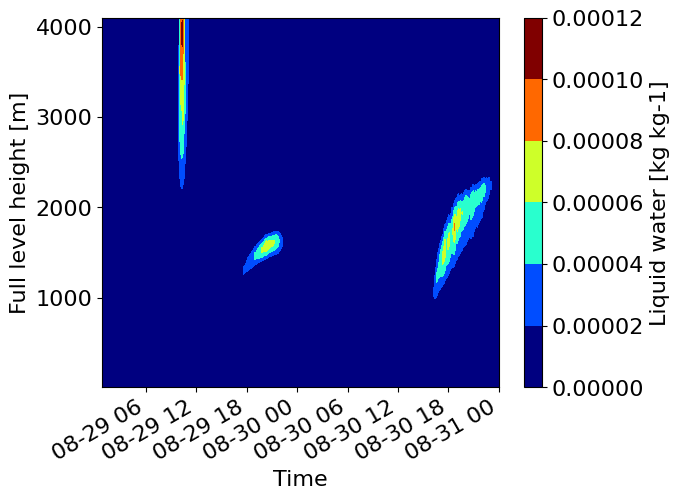

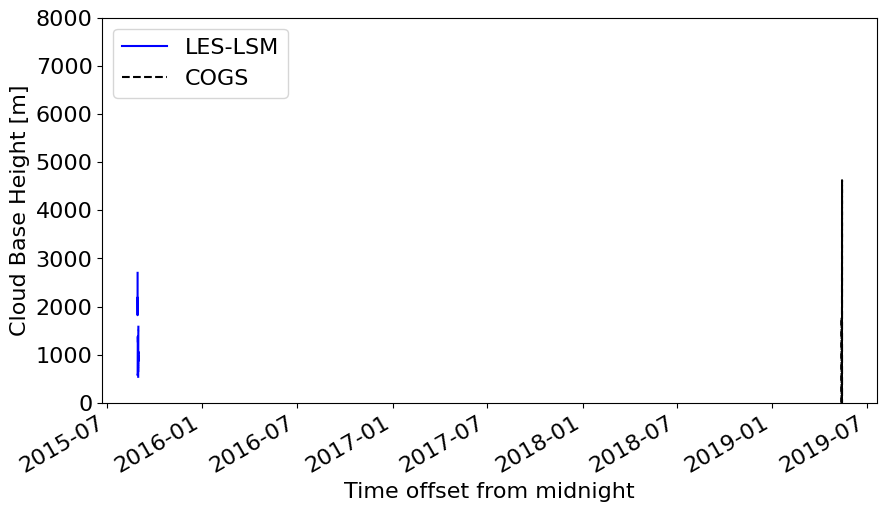

In [13]:
#fig_plot()
matplotlib.rcParams.update({'font.size': 16})

pl.subplots(figsize=(10, 5))
microhh_out['ql'].isel(z=slice(0,100)).transpose().plot.contourf(levels=np.arange(0,0.004,0.0002),cmap='Blues')

pl.subplots(figsize=(10, 5))
(microhh_out2['ql_frac']).isel(z=slice(0,120)).max(dim='z').isel(time=slice(None,None)).plot.line('b-',label=label1)
(microhh_out['ql_frac']).isel(z=slice(0,120)).max(dim='z').isel(time=slice(44*12,None)).plot.line('b-')
cogs_forcing1=xr.open_dataset('/fs/ess/PFS0220/LSM/SEUS/SEUS_obs/sgpcogsN1.c1.20190513.231640.nc',decode_times=True)
cogs_forcing2=xr.open_dataset('/fs/ess/PFS0220/LSM/SEUS/SEUS_obs/sgpcogsN1.c1.20190514.140000.nc',decode_times=True)
cogs_forcing1['cldfrac'].plot.line('k--',label='Cogs')
cogs_forcing2['cldfrac'].plot.line('k--')
pl.legend(loc="upper center")
pl.title('')

pl.figure()
(microhh_out2['ql_cover']).isel(time=slice(None,None)).plot.line('b-',label=label1)
(microhh_out['ql_cover']).isel(time=slice(44*12,None)).plot.line('b-')
cogs_forcing1=xr.open_dataset('/fs/ess/PFS0220/LSM/SEUS/SEUS_obs/sgpcogsN1.c1.20190513.231640.nc',decode_times=True)
cogs_forcing2=xr.open_dataset('/fs/ess/PFS0220/LSM/SEUS/SEUS_obs/sgpcogsN1.c1.20190514.140000.nc',decode_times=True)
cogs_forcing1['cldfrac'].plot.line('k--',label='Cogs forcing')
cogs_forcing2['cldfrac'].plot.line('k--',label='Cogs forcing')
pl.legend(loc="upper center")
pl.title('')

pl.subplots(figsize=(8, 6))
microhh_out['T'].isel(z=0,time=slice(0,30*12)).plot.line(label='MicroHH Prescribed Surface Fluxes')
#microhh_out2['T'].isel(z=0,time=slice(0,30*12)).plot.line(label='MicroHH Prescribed LES-LSM')
lasso_sgp['temperature_surface'].isel(source_type=0).plot.line('k-.',label='Observation')
pl.ylabel('Surface Temperature (K)')
pl.xlabel('Time (UTC)')
pl.legend(bbox_to_anchor=(0.2, 1.03))
pl.title('')


pl.figure()
#microhh_out['ql'].isel(z=slice(0,130)).transpose().plot.contourf(cmap='jet')
(microhh_out2['ql'].isel(z=slice(0,110),time=slice(10,None))).transpose().plot.contourf(cmap='jet')


microhh_out['ql_base']=microhh_out['ql'].isel(z=0)
microhh_out['ql_base']=microhh_out['z'].where(microhh_out['ql']>0,np.nan).min(dim='z')
microhh_out2['ql_base']=microhh_out2['ql'].isel(z=0)
microhh_out2['ql_base']=microhh_out2['z'].where(microhh_out2['ql']>0,np.nan).min(dim='z')


pl.subplots(figsize=(10, 5))
microhh_out['ql_base'].isel(time=slice(44*12,None)).plot.line('b-',label='LES-LSM')
microhh_out2['ql_base'].plot.line('b-')
cogs_forcing1['cbh'].plot.line('k--',label='COGS')
cogs_forcing2['cbh'].plot.line('k--')
pl.legend(loc="upper left")
pl.ylim(0,8000)
